In [1]:
import os
import numpy as np

In [68]:
def count_dif(ref,hyp):
    num1 = len(ref.split())
    num2 = len(hyp.split())
    dif = abs(num1-num2)
    return dif

In [50]:
def wer(ref, hyp ,debug=False):
    r = ref.split()
    h = hyp.split()
    #costs will holds the costs, like in the Levenshtein distance algorithm
    costs = [[0 for inner in range(len(h)+1)] for outer in range(len(r)+1)]
    # backtrace will hold the operations we've done.
    # so we could later backtrace, like the WER algorithm requires us to.
    backtrace = [[0 for inner in range(len(h)+1)] for outer in range(len(r)+1)]

    OP_OK = 0
    OP_SUB = 1
    OP_INS = 2
    OP_DEL = 3

    DEL_PENALTY=1 # Tact
    INS_PENALTY=1 # Tact
    SUB_PENALTY=1 # Tact
    # First column represents the case where we achieve zero
    # hypothesis words by deleting all reference words.
    for i in range(1, len(r)+1):
        costs[i][0] = DEL_PENALTY*i
        backtrace[i][0] = OP_DEL

    # First row represents the case where we achieve the hypothesis
    # by inserting all hypothesis words into a zero-length reference.
    for j in range(1, len(h) + 1):
        costs[0][j] = INS_PENALTY * j
        backtrace[0][j] = OP_INS

    # computation
    for i in range(1, len(r)+1):
        for j in range(1, len(h)+1):
            if r[i-1] == h[j-1]:
                costs[i][j] = costs[i-1][j-1]
                backtrace[i][j] = OP_OK
            else:
                substitutionCost = costs[i-1][j-1] + SUB_PENALTY # penalty is always 1
                insertionCost    = costs[i][j-1] + INS_PENALTY   # penalty is always 1
                deletionCost     = costs[i-1][j] + DEL_PENALTY   # penalty is always 1

                costs[i][j] = min(substitutionCost, insertionCost, deletionCost)
                if costs[i][j] == substitutionCost:
                    backtrace[i][j] = OP_SUB
                elif costs[i][j] == insertionCost:
                    backtrace[i][j] = OP_INS
                else:
                    backtrace[i][j] = OP_DEL

    # back trace though the best route:
    i = len(r)
    j = len(h)
    numSub = 0
    numDel = 0
    numIns = 0
    numCor = 0
    if debug:
        print("OP\tREF\tHYP")
        lines = []
    while i > 0 or j > 0:
        if backtrace[i][j] == OP_OK:
            numCor += 1
            i-=1
            j-=1
            if debug:
                lines.append("OK\t" + r[i]+"\t"+h[j])
        elif backtrace[i][j] == OP_SUB:
            numSub +=1
            i-=1
            j-=1
            if debug:
                lines.append("SUB\t" + r[i]+"\t"+h[j])
        elif backtrace[i][j] == OP_INS:
            numIns += 1
            j-=1
            if debug:
                lines.append("INS\t" + "****" + "\t" + h[j])
        elif backtrace[i][j] == OP_DEL:
            numDel += 1
            i-=1
            if debug:
                lines.append("DEL\t" + r[i]+"\t"+"****")
    if debug:
        lines = reversed(lines)
        for line in lines:
            print(line)
        print("Ncor " + str(numCor))
        print("Nsub " + str(numSub))
        print("Ndel " + str(numDel))
        print("Nins " + str(numIns))
    return (numSub + numDel + numIns) / (float) (len(r))
#     wer_result = round( (numSub + numDel + numIns) / (float) (len(r)), 3)
#     return numSub + numDel + numIns

In [12]:
def open_text(path):
    with open(path,'r',encoding='utf-8') as f:
        text = f.read().splitlines()
    return text

In [51]:
names = os.listdir('texts')
word_error_rate = {}
for name in names:
    caption_path = os.path.join('texts',name)
    asr_path = os.path.join('texts_asr',name)
    caption = open_text(caption_path)
    asr = open_text(asr_path)
    try:
        word_error_rate[name] = wer(caption[0].lower().replace(',','').replace('.',''),asr[0])
    except:
        word_error_rate[name] = 1
        pass

In [52]:
word_error_rate

{'00001_0.txt': 1.0,
 '00001_1.txt': 0.375,
 '00001_10.txt': 1,
 '00001_11.txt': 0.9230769230769231,
 '00001_12.txt': 1,
 '00001_13.txt': 0.4838709677419355,
 '00001_14.txt': 1,
 '00001_15.txt': 2.4285714285714284,
 '00001_16.txt': 0.6326530612244898,
 '00001_17.txt': 1,
 '00001_18.txt': 1,
 '00001_19.txt': 0.41935483870967744,
 '00001_2.txt': 0.3333333333333333,
 '00001_20.txt': 0.06666666666666667,
 '00001_21.txt': 0.2727272727272727,
 '00001_22.txt': 0.1111111111111111,
 '00001_23.txt': 0.1875,
 '00001_24.txt': 0.3157894736842105,
 '00001_25.txt': 0.0,
 '00001_26.txt': 1,
 '00001_27.txt': 0.46153846153846156,
 '00001_28.txt': 1,
 '00001_29.txt': 0.23809523809523808,
 '00001_3.txt': 1,
 '00001_30.txt': 0.125,
 '00001_31.txt': 0.25,
 '00001_4.txt': 0.4,
 '00001_5.txt': 1,
 '00001_6.txt': 0.7058823529411765,
 '00001_7.txt': 1,
 '00001_8.txt': 0.07692307692307693,
 '00001_9.txt': 1,
 '00002_0.txt': 0.0,
 '00002_1.txt': 0.3333333333333333,
 '00002_10.txt': 0.0,
 '00002_11.txt': 0.1176470

In [70]:
word_dif = {}
for name in names:
    caption_path = os.path.join('texts',name)
    asr_path = os.path.join('texts_asr',name)
    caption = open_text(caption_path)
    asr = open_text(asr_path)
    try:
        word_dif[name] = count_dif(caption[0].lower().replace(',','').replace('.',''),asr[0])
    except:
        word_dif[name] = 100
        pass

In [71]:
word_dif

{'00001_0.txt': 0,
 '00001_1.txt': 2,
 '00001_10.txt': 100,
 '00001_11.txt': 22,
 '00001_12.txt': 100,
 '00001_13.txt': 12,
 '00001_14.txt': 100,
 '00001_15.txt': 17,
 '00001_16.txt': 30,
 '00001_17.txt': 100,
 '00001_18.txt': 100,
 '00001_19.txt': 5,
 '00001_2.txt': 3,
 '00001_20.txt': 0,
 '00001_21.txt': 0,
 '00001_22.txt': 1,
 '00001_23.txt': 1,
 '00001_24.txt': 1,
 '00001_25.txt': 0,
 '00001_26.txt': 100,
 '00001_27.txt': 6,
 '00001_28.txt': 100,
 '00001_29.txt': 4,
 '00001_3.txt': 100,
 '00001_30.txt': 0,
 '00001_31.txt': 0,
 '00001_4.txt': 1,
 '00001_5.txt': 100,
 '00001_6.txt': 8,
 '00001_7.txt': 100,
 '00001_8.txt': 0,
 '00001_9.txt': 100,
 '00002_0.txt': 0,
 '00002_1.txt': 1,
 '00002_10.txt': 0,
 '00002_11.txt': 1,
 '00002_12.txt': 0,
 '00002_13.txt': 0,
 '00002_14.txt': 1,
 '00002_15.txt': 2,
 '00002_16.txt': 0,
 '00002_17.txt': 1,
 '00002_18.txt': 10,
 '00002_19.txt': 100,
 '00002_2.txt': 0,
 '00002_20.txt': 0,
 '00002_21.txt': 0,
 '00002_22.txt': 0,
 '00002_23.txt': 0,
 '00

In [137]:
len(open_text('texts/00093_3.txt')[0].replace(',','').replace('.','').split())

798

In [73]:
open_text('texts_asr/00011_0.txt')

["hi everybody i'm speaking in due today from springfield illinois i spent eight years in the state senator here who is a place where for all of our surface differences in a state as diverse as illinois my colleagues and i actually shared a lot in common we fought for our principles we voted against each other but because we assumed the best in one another and not the worst we found room for progress we bridged differences to get things done in my travels through the states i saw most americans do the sank folks know that issues are complicated and the people were different ideas might have a point it convinced me that if we just approached our politics the same way we approach our daily lives with common sense and a commandment to fairness and the belief that we're all in this together then there's nothing that we cannot do"]

## count word num distribution

In [86]:
names = os.listdir('texts')
word_error_rate = {}
counts = []
for name in names:
    caption_path = os.path.join('texts',name)
    caption = open_text(caption_path)
    try:
        num = len(caption[0].lower().replace(',','').replace('.','').split())
    except:
        num = 0
        pass
    counts.append(num)
   

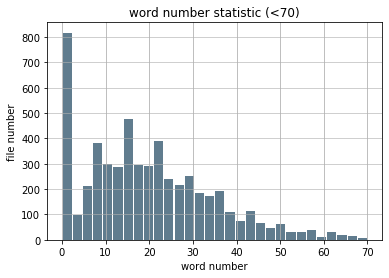

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
size, scale = 100, 10
commutes = pd.Series(counts[:-100])
 
commutes.plot.hist(grid=True, bins=30, rwidth=0.9,
     color='#607c8e')
plt.title('word number statistic (<70)')
plt.xlabel('word number')
plt.ylabel('file number')
plt.grid(axis='y', alpha=0.75)

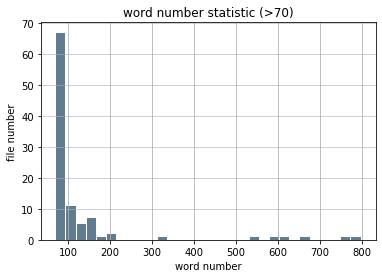

In [127]:
size, scale = 100, 10
commutes = pd.Series(counts[-100:])
 
commutes.plot.hist(grid=True, bins=30, rwidth=0.9,
     color='#607c8e')
plt.title('word number statistic (>70)')
plt.xlabel('word number')
plt.ylabel('file number')
plt.grid(axis='y', alpha=0.75)

In [152]:
# select files with word num >5 and <= 35
names = os.listdir('texts')
selected_files = []
for name in names:
    caption_path = os.path.join('texts',name)
    caption = open_text(caption_path)
    try:
        num = len(caption[0].lower().replace(',','').replace('.','').split())
    except:
        num = 0
        pass
    if num>5 and num <=36:
        selected_files.append(name)

In [131]:
(np.array(counts)<=5).sum()

993

In [151]:
(np.array(counts)>36).sum() / 5569

0.14688453941461663

In [155]:
len(selected_files)

3758

## statistic the sentence length difference between the ASR and captions

In [158]:
# word_dif = {}
select_files = {}
word_difs = []
for name in selected_files:
    caption_path = os.path.join('texts',name)
    asr_path = os.path.join('texts_asr',name)
    caption = open_text(caption_path)
    asr = open_text(asr_path)
    try:
        word_dif = count_dif(caption[0].lower().replace(',','').replace('.',''),asr[0])
    except:
        word_dif = 20
        pass
    word_difs.append(word_dif)

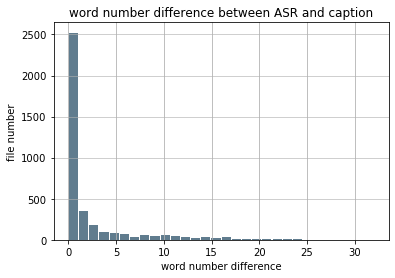

In [160]:
commutes = pd.Series(word_difs)
 
commutes.plot.hist(grid=True, bins=30, rwidth=0.9,
     color='#607c8e')
plt.title('word number difference between ASR and caption')
plt.xlabel('word number difference')
plt.ylabel('file number')
plt.grid(axis='y', alpha=0.75)

## select the files that sentence length difference less than 3

In [166]:
selected_files_2 = []
for name in selected_files:
    caption_path = os.path.join('texts',name)
    asr_path = os.path.join('texts_asr',name)
    caption = open_text(caption_path)
    asr = open_text(asr_path)
    try:
        word_dif = count_dif(caption[0].lower().replace(',','').replace('.',''),asr[0])
    except:
        word_dif = 20
        pass
    if word_dif <= 2:
        selected_files_2.append(name)

In [167]:
len(selected_files_2)

2868

In [168]:
selected_files_2

['00001_1.txt',
 '00001_20.txt',
 '00001_21.txt',
 '00001_22.txt',
 '00001_23.txt',
 '00001_24.txt',
 '00001_25.txt',
 '00001_30.txt',
 '00001_31.txt',
 '00001_4.txt',
 '00001_8.txt',
 '00002_1.txt',
 '00002_10.txt',
 '00002_11.txt',
 '00002_12.txt',
 '00002_13.txt',
 '00002_14.txt',
 '00002_16.txt',
 '00002_17.txt',
 '00002_2.txt',
 '00002_20.txt',
 '00002_21.txt',
 '00002_23.txt',
 '00002_24.txt',
 '00002_25.txt',
 '00002_27.txt',
 '00002_28.txt',
 '00002_29.txt',
 '00002_5.txt',
 '00002_6.txt',
 '00002_7.txt',
 '00002_8.txt',
 '00002_9.txt',
 '00004_0.txt',
 '00004_11.txt',
 '00004_13.txt',
 '00004_14.txt',
 '00004_2.txt',
 '00004_3.txt',
 '00004_4.txt',
 '00004_5.txt',
 '00004_6.txt',
 '00004_7.txt',
 '00005_10.txt',
 '00005_11.txt',
 '00005_12.txt',
 '00005_13.txt',
 '00005_14.txt',
 '00005_15.txt',
 '00005_4.txt',
 '00005_5.txt',
 '00005_6.txt',
 '00005_7.txt',
 '00005_8.txt',
 '00006_0.txt',
 '00006_1.txt',
 '00006_11.txt',
 '00006_12.txt',
 '00006_13.txt',
 '00006_14.txt',
 '00

In [169]:
import json
with open('select_files_2868.json','w') as f:
    json.dump(selected_files_2,f)